# Part 1 - Theoretical questions

---

Question 1:

No, there is no truth to the idea that the number of storks causes more babies to be born. At first glance, it might seem true.

Correlation means that two variables appear to move together. For example, in areas where there are fewer storks, fewer babies are born, while in places with more storks, more babies are born.

Causation means that one variable directly affects the other. In this case, the claim that storks actually cause more babies to be born.

In this scenario, there is a correlation but no causation. There is no direct link between the number of storks and the number of babies born.

Question 2:

a)

Correlation is basically about how two things are connected. If one changes, does the other change too?

In the chart, you can see something called the correlation coefficient (r), which ranges from 1 to -1.

A positive correlation means that when one value goes up, the other goes up too. If r = 1, that’s a perfect match, and the points form a straight upward line.
If r is lower (like 0.8 or 0.4), it still trends upward but with more variation.

If r = 0, there’s no correlation. That means there’s no real connection between the two things.

A negative correlation means that when one goes up, the other goes down. Just like a positive one, it can be strong (r = -1) or weaker (like -0.4), but it goes in the opposite direction.

b)

Is the mean (average) better than the median?

Not always. Kim says the mean is better, but it depends on the situation.

The mean is calculated by adding up all values and dividing by the number of values. But it can be misleading. For example, when you look at salaries in a company, a few really high salaries can raise the average, even if most people earn less.

The median, which is the middle value when all numbers are sorted, often gives a more realistic picture. This is especially true when the data is uneven or has outliers.

So no, the mean isn’t always the better choice.

c)

A pie chart is great when you want to show how something is divided into parts.

For example, a company that sells through different channels might use a pie chart to show:

- 25% from phone sales
- 25% from ads
- 50% from door-to-door sales

It’s an easy way to see how each part contributes to the whole.

d)

A line chart works best when you want to show change over time.

Let’s say you’re tracking Spotify’s users. A line chart could show:

- How free vs. premium user numbers are shifting
- How the popularity of country music has gone up or down over time

It helps you spot trends. You can see what’s growing, what’s shrinking, and what’s staying the same.

e)
A box plot (or box-and-whisker plot) shows how your data is spread out. It gives a snapshot of:

- What’s typical
- What’s high or low
- Whether the data is tightly grouped or all over the place

It’s really helpful when you want a quick overview of the distribution in your dataset.

In [ ]:
from scipy.stats import norm

In [ ]:
#medelvarde = 3,5
#standardavvik = 0.5
medelvarde = 3.5
standardavvik = 0.5

# Sannolikhet att ett barn väger över 4.5 kg
sannolikhet_4_5 = 1 - norm.cdf(4.5, medelvarde, standardavvik)
print(f"Sannolikheten att ett barn väger över 4.5 kilogram är följande: {sannolikhet_4_5:.4f}") # antal decimaler som ska visas.

# Mindre än 3 kilogram?
Sannolikhet_under_three = norm.cdf(3, medelvarde, standardavvik)
print(f"Sannolikheten att ett barn väger under 3 kilogram är: {Sannolikhet_under_three:.4f}")

#Bland 1000 barn hur många väger över 4.5?
barn = 1000
antal_over_4_5_forvantan = sannolikhet_4_5 * Barn
print(f"Förväntat antal barn som är över 4.5 bland {barn} är: {antal_over_4_5_forvantan:.2f}")

# Part 2

---


## Purpose of the Analysis


The aim of this analysis is to uncover patterns and insights in the company’s employee data that can help improve decisions around people management, work environment, and staff retention. The data comes from an HR dataset that includes details like employees’ salary, job satisfaction, years at the company, and whether or not they’ve left the organization.

Main Questions We’re Exploring

- What factors seem to increase the chances of someone leaving the company?
- How are job satisfaction, monthly working hours, salarys and promotions connected to employee turnover?


In [ ]:
# Importerar viktiga moduler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# import streamlit as st - Not enough time.
import scipy.stats as st

st.write(Analys)


In [13]:
# Loading dataset Personaldata

personal_data = r"C:\Users\Marco\Desktop\TUC\Data24Hel\Statistik och dataanalys\Kunskapskontroll_1\HR_Employee_Data.xlsx"

df = pd.read_excel(personal_data)

In [ ]:
# Accidently rewrote my data.
# df = personal_data 

In [14]:
print("Company statistics for employees:")
print(df.describe())

Company statistics for employees:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%    

# Overview

---

- Most employees have a medium level of job satisfaction (0.613).
- The average monthly working time is around 201 hours, but some employees work up to 310 hours!
- On average, employees stay at the company for 3.5 years before moving on in their careers. Some have worked at the company for up to 10 years.
- 23.8% of the employees have left the company.
- Only 2.1% have been promoted in the past 5 years, which may have affected their motivation and how employees performs at work.

# Employees

---

In [15]:
Employeers_that_quit = df["left"].value_counts(normalize=True) * 100
print("Employeer that quit:", Employeers_that_quit)

Employeer that quit: left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


C:\Users\Marco\AppData\Local\Temp\ipykernel_13524\348376391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="left", data=df, palette="pastel")


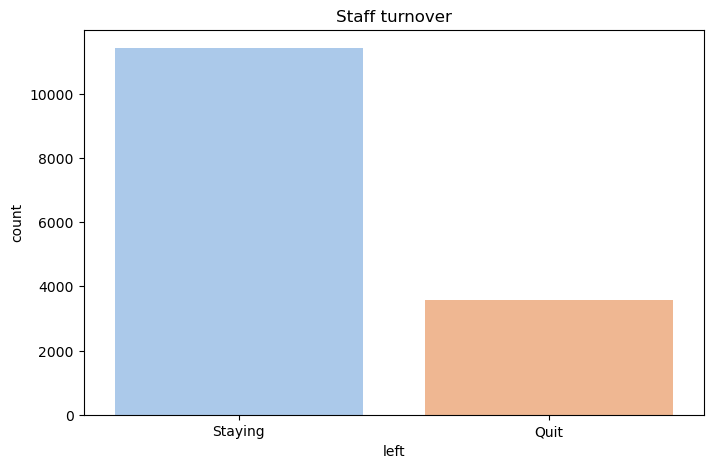

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x="left", data=df, palette="pastel")
plt.xticks(ticks=[0,1], labels=["Staying", "Quit"])
plt.title("Staff turnover")
plt.show()

By using the variable "Employees_that_quit", we can determine the exact percentage of employees who stay versus those who leave.
23.8% of our employees have left the company, while 76.2% have stayed.

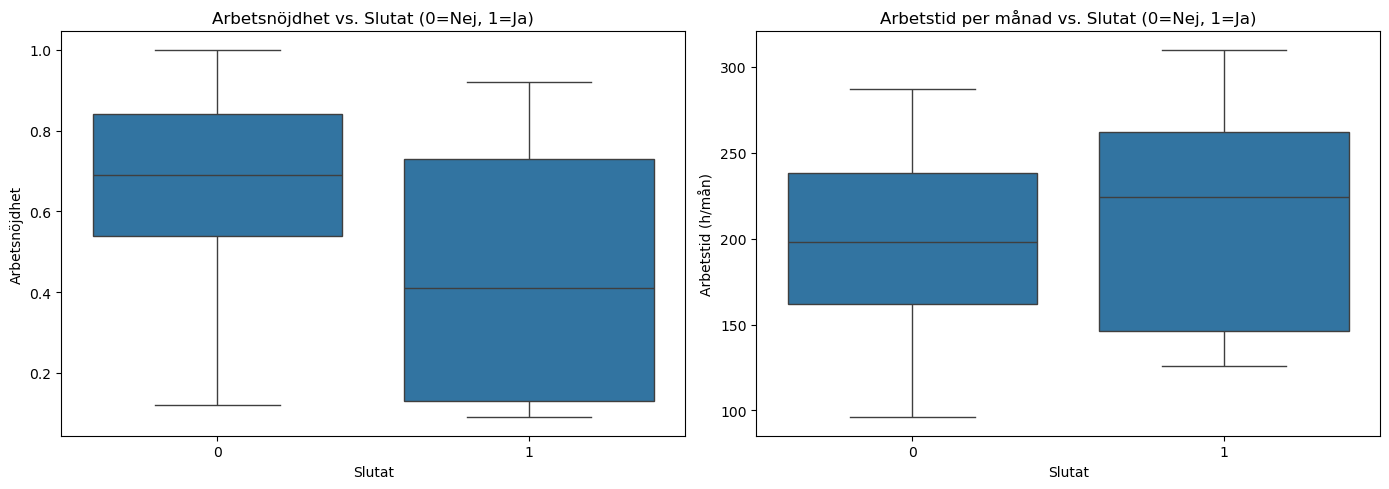

In [ ]:
# Skapar 2st diagram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Diagram 1: Vad är kopplingen mellan arbetsnöjdhet och uppsägningar?
sns.boxplot(data=df, x="left", y="satisfaction_level", ax=axes[0])
axes[0].set_title("Arbetsnöjdhet vs. Slutat (0=Nej, 1=Ja)")
axes[0].set_xlabel("Slutat")
axes[0].set_ylabel("Arbetsnöjdhet")

# Diagram 2: Vad är sambandet mellan uppsägningar och arbetstiden?
sns.boxplot(data=df, x="left", y="average_montly_hours", ax=axes[1])
axes[1].set_title("Arbetstid per månad vs. Slutat (0=Nej, 1=Ja)")
axes[1].set_xlabel("Slutat")
axes[1].set_ylabel("Arbetstid (h/mån)")

plt.tight_layout()
plt.show()


Chart 1 shows the connection between job satisfaction and the employees who’ve left.
It’s clear that those who quit generally had lower job satisfaction.
In simple terms when people aren’t happy at work, they’re more likely to leave.

Chart 2 looks at how monthly working hours relate to people quitting.
This one tells an interesting story. The number of hours someone works seems to matter. There are two patterns we can see:

1. Working more than average may lead to feeling overwhelmed or burned out.

2. Working fewer hours than average might mean someone isn’t very engaged.

Together, these charts highlight two key reasons people choose to leave. They are either stretched too thin or not connected enough to the job.

#  Is there a connection between salaries, promotions and layoffs?

Text(0, 0.5, 'Workers')

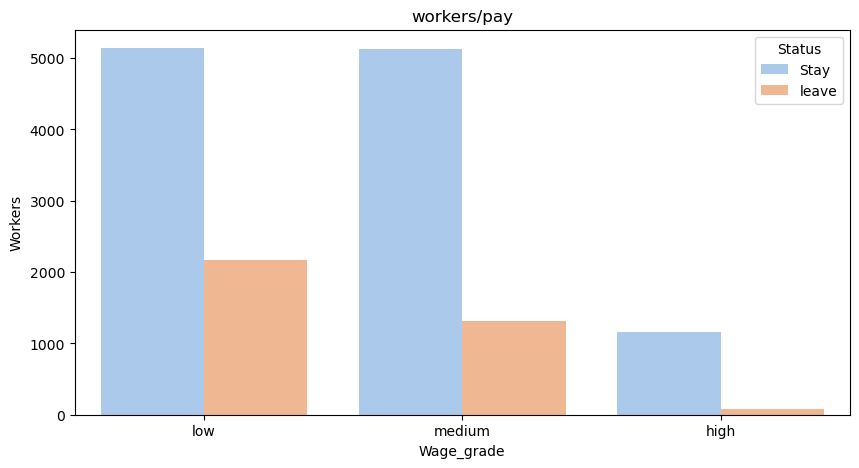

In [41]:
plt.figure(figsize=(10,5))

sns.countplot(x="salary", hue="left", data=df, palette="pastel")

plt.legend(title="Status", labels=["Stay", "leave"])

plt.title("workers/pay")
plt.xlabel("Wage_grade")
plt.ylabel("Workers")
# plot.show

What can we see from the chart?
There is a high turnover rate among employees in lower-paying positions compared to other groups.

1. This suggests a clear link between low salaries and employees choosing to leave.

2. The pay isn’t competitive, so employees are looking for better-paying jobs.

3. There seems to be a lack of opportunities for growth within the company.

Considering the risk of overwork and/or part-time contracts, the working conditions for lower-paid roles may be poor.

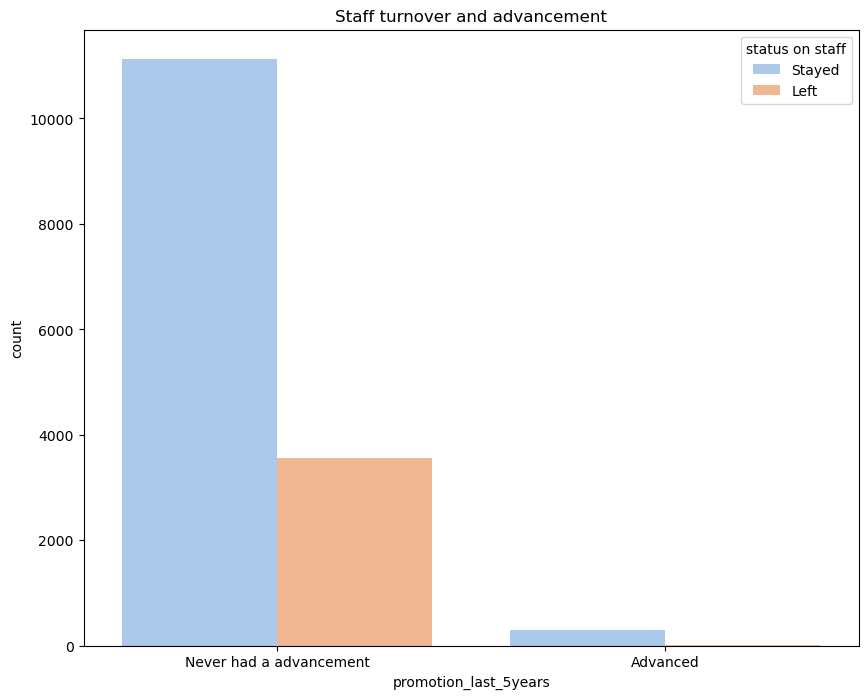

In [40]:
plt.figure(figsize=(10,8))

sns.countplot(x="promotion_last_5years", hue="left", data=df, palette="pastel")

plt.legend(title="status on staff", labels=["Stayed", "Left"])

plt.xticks(ticks=[0,1], labels=["Never had a advancement", "Advanced"])
plt.title("Staff turnover and advancement")
plt.show()

# Summary

---

This analysis of employee data reveals several important insights about staff turnover and well-being at Nytto Maximerarna. One of the clearest patterns is that people who are less satisfied with their jobs are much more likely to leave. In fact, job satisfaction is noticeably lower among those who have left the company, showing just how important a positive work environment is for keeping employees happy and engaged.

Another key finding is the impact of heavy workloads. Employees who left the company tended to work more hours per month, and in some cases, a lot more. This suggests that high demands and long hours could be leading to burnout, pushing people to move on.

Salary also plays a big role. Those in lower pay ranges are leaving at much higher rates, which may mean the compensation isn't competitive enough, or that these employees don’t see enough opportunities to grow and develop in their roles.

Lastly, a lack of career development seems to be a major issue. Almost none of the employees who were promoted in the past five years have left, while a large number of those without promotions have. This really highlights how important it is for employees to feel like they’re moving forward and being recognized.

# Recommendation

---

1. How do people feel at work?

We need to dig deeper into why some employees aren’t feeling satisfied. That means having honest conversations, asking the right questions, and making changes where it counts — whether it’s about leadership, the work environment, or just day-to-day culture.

2. Watch out for burnouts

Some people are working a lot more than others — and that’s not sustainable. We should take a closer look at how workloads are spread out and make sure no one is quietly burning out behind the scenes.

3. Wage!

If people in lower-paid roles are leaving more often, we should ask ourselves: are we paying them fairly? Let’s compare with what others in the industry are offering and think about adjustments where needed — not just to stay competitive, but to show we value everyone.

4. Growing!

One clear takeaway: people who get promoted tend to stay. So let’s give everyone a chance to grow with clear paths forward, opportunities to learn new things and recognition for the work they are already doing.

If we take these steps, we are not just reducing turnover we are building a place where people want to stay, do their best and feel proud to be part of the team.